In [1]:
# 导入相应包
import torch
import numpy as np
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

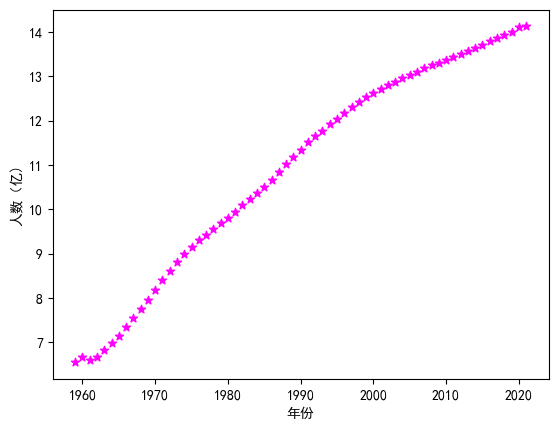

In [2]:
# 获取数据
# 因原本的数据本身较大，为了后续绘图方便，这里将人口转成以万做单位
data = pd.read_csv('./assets/人口总数表.csv', encoding='gbk', usecols=[1], )
data = np.array(data)
population = data[10:].flatten()
year = torch.unsqueeze(torch.arange(start=1959.0, end=2022.0, step=1.0, out=None), dim=1)
year = year - 1958  # year-1958，假设1959年为第1年
cp = torch.unsqueeze(torch.tensor([6.55, 6.67, 6.6, 6.66, 6.82, 6.98, 7.15, 7.35, 7.55,
                                   7.75, 7.96, 8.18, 8.41, 8.62, 8.82, 9.0, 9.16, 9.31,
                                   9.43, 9.56, 9.69, 9.81, 9.94, 10.09, 10.23, 10.37, 10.51,
                                   10.67, 10.84, 11.02, 11.19, 11.35, 11.51, 11.65, 11.78, 11.92, 
                                   12.05, 12.18, 12.3, 12.42, 12.53, 12.63, 12.72, 12.8, 12.88,
                                   12.96, 13.04, 13.11, 13.18, 13.25, 13.31, 13.38, 13.44, 13.51,
                                   13.57, 13.64, 13.71, 13.79, 13.86, 13.93, 14.00, 14.12, 14.13]), dim=1)   # 单位：亿
plt.scatter(year.data.numpy()+1958, cp.data.numpy(), marker='*',c='magenta')
plt.xlabel('年份')
plt.ylabel('人数（亿)')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [3]:
class PAnet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output, hidden_num=1):
        super(PAnet, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden)   # hidden1 layer
        self.hidden2 = torch.nn.ModuleList([torch.nn.Linear(n_hidden, n_hidden) for i in range(hidden_num)])
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer        
        
    def forward(self, x):
        x = F.relu(self.hidden1(x)) 
        for i, h in enumerate(self.hidden2):
            x = F.relu(h(x))
        x = self.predict(x) # linear output
        return x

In [4]:
torch.manual_seed(1)    # reproducible
def train(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS):
    '''
    EPOCH          训练次数
    LR             学习率
    HIDDEN_SIZE    隐藏层网络宽度
    HIDDEN_LAYERS  隐藏层深度
    
    '''
    time = np.arange(EPOCH)   # 产生自变量
    loss_list = []
    cn_panet = PAnet(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1, hidden_num=HIDDEN_LAYERS-1)     # define the network
    print(cn_panet)  # net architecture
    optimizer = torch.optim.SGD(cn_panet.parameters(), lr=LR)  # 调小学习率
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
    for t in range(EPOCH):
        prediction = cn_panet(year)          # input x and predict based on x
        loss = loss_func(prediction, cp)     # must be (1. nn output, 2. target)
        loss_list.append(loss)

        optimizer.zero_grad()                # clear gradients for next train
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients    
    return time, loss_list


In [5]:
# Hyper Parameters
EPOCH = 5000 # 训练次数
LR = 0.002 # 学习率
HIDDEN_SIZE = 30 # 隐藏层网络宽度
HIDDEN_LAYERS = 5 # 隐藏层深度
time, loss_list_02 = train(EPOCH, 0.2, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0005 = train(EPOCH, 0.005, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0002 = train(EPOCH, 0.002, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0003 = train(EPOCH, 0.003, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0004 = train(EPOCH, 0.004, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_0001 = train(EPOCH, 0.001, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_00002 = train(EPOCH, 0.0002, HIDDEN_SIZE, HIDDEN_LAYERS)
time, loss_list_000002 = train(EPOCH, 0.00002, HIDDEN_SIZE, HIDDEN_LAYERS)
# time, loss_list_0005 = train(EPOCH, LR, HIDDEN_SIZE, 8)
# time, loss_list_0002 = train(EPOCH, LR, HIDDEN_SIZE, 6)
# time, loss_list_0003 = train(EPOCH, LR, HIDDEN_SIZE, 5)
# time, loss_list_0004 = train(EPOCH, LR, HIDDEN_SIZE, 3)
# time, loss_list_0001 = train(EPOCH, LR, HIDDEN_SIZE, 2)

PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0-3): 4 x Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0-3): 4 x Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0-3): 4 x Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2): ModuleList(
    (0-3): 4 x Linear(in_features=30, out_features=30, bias=True)
  )
  (predict): Linear(in_features=30, out_features=1, bias=True)
)
PAnet(
  (hidden1): Linear(in_features=1, out_features=30, bias=True)
  (hidden2

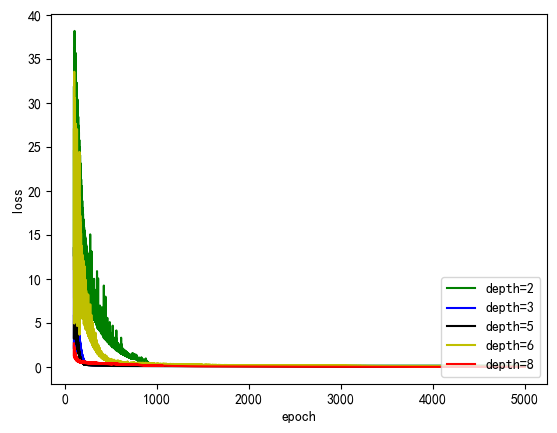

In [7]:
loss_list_0001_num = []
loss_list_0002_num = []
loss_list_0003_num = []
loss_list_0004_num = []
loss_list_0005_num = []
for i in range(len(loss_list_0001)):
    value_1 = loss_list_0001[i].cpu().detach().numpy()
    value_2 = loss_list_0002[i].cpu().detach().numpy()
    value_3 = loss_list_0003[i].cpu().detach().numpy()
    value_4 = loss_list_0004[i].cpu().detach().numpy()
    value_5 = loss_list_0005[i].cpu().detach().numpy()
    loss_list_0001_num.append(value_1)
    loss_list_0002_num.append(value_2)
    loss_list_0003_num.append(value_3)
    loss_list_0004_num.append(value_4)
    loss_list_0005_num.append(value_5)

# plt.plot(time[100:], loss_list_0001_num[100:], 'g-', label='lr=0.001') 
# plt.plot(time[100:], loss_list_0002_num[100:], 'b-', label='lr=0.002') 
# plt.plot(time[100:], loss_list_0003_num[100:], 'k-', label='lr=0.003') 
# plt.plot(time[100:], loss_list_0004_num[100:], 'y-', label='lr=0.004') 
# plt.plot(time[100:], loss_list_0005_num[100:], 'r-', label='lr=0.005') 
plt.plot(time[100:], loss_list_0001_num[100:], 'g-', label='depth=2') 
plt.plot(time[100:], loss_list_0002_num[100:], 'b-', label='depth=3') 
plt.plot(time[100:], loss_list_0003_num[100:], 'k-', label='depth=5') 
plt.plot(time[100:], loss_list_0004_num[100:], 'y-', label='depth=6') 
plt.plot(time[100:], loss_list_0005_num[100:], 'r-', label='depth=8') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')  # 说明图例  # loc='lower right' 设置图例放置位置


In [8]:
# 训练并且保存网络函数
def trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS):
    '''
    EPOCH          训练次数
    LR             学习率
    HIDDEN_SIZE    隐藏层网络宽度
    HIDDEN_LAYERS  隐藏层深度
    
    '''
    time = np.arange(EPOCH)   # 产生自变量
    loss_list = []
    cn_panet = PAnet(n_feature=1, n_hidden=HIDDEN_SIZE, n_output=1, hidden_num=HIDDEN_LAYERS-1)     # define the network
    print(cn_panet)  # net architecture
    optimizer = torch.optim.SGD(cn_panet.parameters(), lr=LR)  # 调小学习率
    loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
    for t in range(EPOCH):
        prediction = cn_panet(year)          # input x and predict based on x
        loss = loss_func(prediction, cp)     # must be (1. nn output, 2. target)
        loss_list.append(loss)

        optimizer.zero_grad()                # clear gradients for next train
        loss.backward()                      # backpropagation, compute gradients
        optimizer.step()                     # apply gradients    
    torch.save(cn_panet, 'cn_panet.pkl')  # save entire net
    print("成功保存网络")
    return time, loss_list

In [9]:
# 读取网络模型函数
def restore_net(netname):
    # restore entire net1 to net2
    net = torch.load(netname)
    return net

PAnet(
  (hidden1): Linear(in_features=1, out_features=32, bias=True)
  (hidden2): ModuleList(
    (0-6): 7 x Linear(in_features=32, out_features=32, bias=True)
  )
  (predict): Linear(in_features=32, out_features=1, bias=True)
)
成功保存网络


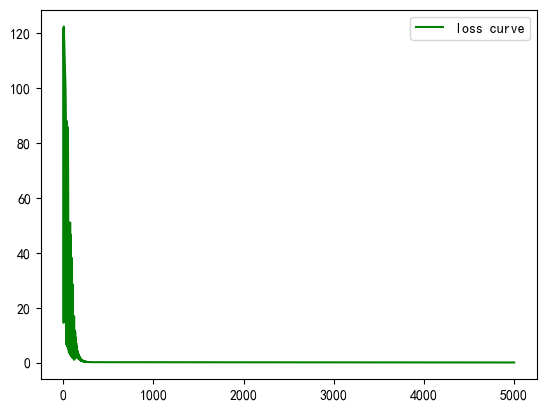

In [10]:
# 根据最优参数进行配置
EPOCH = 5000 # 训练次数
LR = 0.003 # 学习率
HIDDEN_SIZE = 32 # 隐藏层网络宽度
HIDDEN_LAYERS = 8 # 隐藏层深度
time, loss_list_02 = trainandsave(EPOCH, LR, HIDDEN_SIZE, HIDDEN_LAYERS)
loss_list_0002_num = []
for i in range(len(loss_list_0002)):
    value_2 = loss_list_0002[i].cpu().detach().numpy()
    loss_list_0002_num.append(value_2)
plt.plot(time, loss_list_0002_num, 'g-', label='loss curve') 
plt.legend(loc='upper right')
plt.show()

In [11]:
reload_net = restore_net('cn_panet.pkl')

y_pre = np.arange(2023-1958, 2033-1958).reshape(10, 1)
year_pre = torch.FloatTensor([y_pre])
print(year_pre.shape)
cp_pre = reload_net(year_pre)
print("预测的2023-2032年人口为：\n",cp_pre.cpu().detach().numpy())

torch.Size([1, 10, 1])
预测的2023-2032年人口为：
 [[[14.3315  ]
  [14.405607]
  [14.479714]
  [14.553822]
  [14.627931]
  [14.702038]
  [14.776145]
  [14.850251]
  [14.924357]
  [14.998466]]]


C:\Users\31147\AppData\Local\Temp\ipykernel_1424\1213093216.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  year_pre = torch.FloatTensor([y_pre])


Text(0, 0.5, 'population')

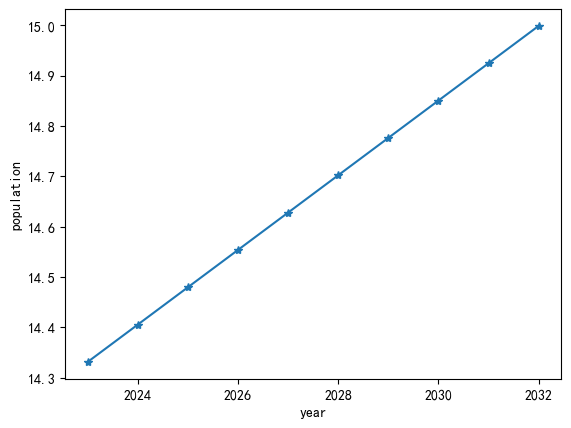

In [14]:
plt.plot(np.arange(2023, 2033), cp_pre.cpu().detach().numpy().flatten(), label='logistic predict',marker='*')
plt.xlabel('year')
plt.ylabel('population')